# Python Assignment Spring 2021
## by: Nick Topping

Install biopython if you haven't already

In [1]:
pip install biopython #installs the package 'biopython' needed for this analysis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import Bio #imports the package
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import GC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If biopython is not installed, use the command "$ conda install biopython" in your terminal window or using the pip command above

## Function 1: Gets the sequences from bears_cytb.fasta and document Dr. X's code

I documented Dr. X's function below

In [3]:
def get_sequences_from_file(fasta_fn): #defines a new function called "get_sequences_from_file" from our fasta file that contains multiple sequences
    sequence_data_dict = {} #creates an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #This function identifies sequences within our fasta file for every record
        description = record.description.split() #creates a new variable "description" and splits the entries
        species_name = description[1] + " " + description[2] #creates the species name from the file
        sequence_data_dict[species_name] = record.seq #assigns the correct sequence to the correct species name
    return(sequence_data_dict) #returns the dictionary

## Function 2: Write a function from Dr. X's provided pseudocode to translate nucleotides into amino acids (with documentation)

Check to see what the provided function does

In [4]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #creates a new table of known vertebrate mitochondrial codons derived from a DNA sequence
print(mito_table) #prints the table to see

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [5]:
def translate_function(string_nucleotides): #defines a new function to translate the nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # imports in a codon table of vertebrate mitochodnrial DNA
    aa_seq_strings = "" #creates a new variable to store the amino acids sequences in
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i]+ string_nucleotides[i+1]+string_nucleotides[i+2] #identifies a codon as a set of 3 nucleotides 
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG": # identifies a stop codon
            break #will stop the function right before the stop codon
            #if we don't break the function, the amino acid sequence will contain more AA's than actually exist in the sequence
        else: #will continue the function 
            aa_seq_strings += mito_table.forward_table[codon] #translates each codon into an amino acid
    return(aa_seq_strings) #returns the completed amino acid sequence

Did it work?

In [6]:
dna_to_aa_sequence_example = "GATCGCTACTCTAGTATCAGT" #created a new variable with a short DNA sequence
translate_function(dna_to_aa_sequence_example) #example from Function 2

'DRYSSIS'

## Function 3: Write an alternative function to translate nucleotide sequences to amino acids

In [7]:
def translate_function_alternative(string_nucleotides): #creates a new alternative function that translates a nucleotide sequence into amino acids
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #uses the "Vertebrate Mitochondrial" codon table to translate the nucleotide sequence
    aa_seq_string = str(Seq.translate(string_nucleotides, mito_table)) [:-1] #this creates the AA sequence. the "[:-1]" part of the function specifies to drop the last amino acid sequence, which would be the stop codon
    return(aa_seq_string) #returns the new AA sequence

Did it work?

In [8]:
dna_to_aa_sequence_example = "GATCGCTACTCTAGTATCAGT" #same variable I created for the last test
translate_function_alternative(dna_to_aa_sequence_example) #example from Function 3

'DRYSSI'

## Function 4: Write a function that calculates the molecular weight of each amino acid sequence

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis #use this to load in the ProteinAnalysis function from ProtParam in BioPython
def aa_molecular_weight(aa_seq): #define function for computing the molecular weight of an amino acid sequence
    analysed_aa = ProteinAnalysis(aa_seq) #uses the ProteinAnalysis function to calculate the molecular weight of the sequence
    return (analysed_aa.molecular_weight()) #returns the molecular weight of the sequence

Did it work?

In [10]:
aa_sequence_example = "TURTLES" #new example sequence, each letter is an amino acid
#note: the sequence should be in upper case
aa_molecular_weight(aa_sequence_example) #function 4 with example sequence

855.7956

# Main

In [11]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") #pulls the sequences from the fasta file and puts them in a new list calles "cytb_seqs"
bears_df = pd.read_csv("bears_mass.csv") #creates a new data frame for body mass data of each bear species
species_list = list(bears_df.species) #creates a new list composed of each bear species in the data set pulled from the 'species' column

## Function 5: Write a function that calculates the GC content

In [12]:
#I found this function on a website with documentation about the biopython package https://biopython.org/docs/1.75/api/Bio.SeqUtils.html
def compute_gc_content(nucleotides): #defines a new function where GC content is read from a nucleotide sequence
    gc_content = GC(nucleotides) #testin the function using the example DNA sequence I made up earlier
#this gives the GC content in a percentage of the total DNA sequence
    return(gc_content) #returns GC content

## Function 6: Add two new columns with the molecular weight data and the GC content data

In [13]:
bears_df['molecular_weight'] = 'NaN' #creates a new column with the header "molecular_weight"
bears_df['GC_content'] = 'NaN' #creates a new column with the header "GC_content"
print(bears_df) #prints the data frame with the two new columns to the right of the original data
#all values are set to 'NaN' indicating that they are empty cells (to be filled later)

                  species     mass molecular_weight GC_content
0          Ursus spelaeus  550.800              NaN        NaN
1            Ursus arctos  203.500              NaN        NaN
2        Ursus thibetanus   99.714              NaN        NaN
3        Melursus ursinus  100.030              NaN        NaN
4        Ursus americanus  110.560              NaN        NaN
5     Helarctos malayanus   47.020              NaN        NaN
6  Ailuropoda melanoleuca  118.200              NaN        NaN
7      Tremarctos ornatus  140.700              NaN        NaN
8         Ursus maritimus  425.100              NaN        NaN


## Function 7: Write a for loop that translates each sequence and also gets molecular weight and computes the GC content

In [14]:
row = 0 #initializes the variable row to the first row in the data frame
for key, value in cytb_seqs.items():
    aa_seq = translate_function_alternative(value) #creates a variable aa_seq that becomes the amino acid sequence for each ursid species respectively
    #or you can use the original translate_function
    computed_molecular_weight = aa_molecular_weight(aa_seq) #computes the molecular weights of the amino acid sequences of each ursid species
    bears_df.loc[row, "molecular_weight"] = computed_molecular_weight #adds the computed molecular weight values into the column named 'molecular_weight'
    computed_gc_content = GC(value) #computes the percentage of GC bases in the DNA sequences of each ursid species
    bears_df.loc[row, "GC_content"] = computed_gc_content #adds the computed GC content percentage into the column named 'GC_content'
    row = row + 1 #designates the function to move forward one row each time
print(bears_df) #prints out the data frame to see with the computed values

                  species     mass molecular_weight GC_content
0          Ursus spelaeus  550.800          42458.8    43.7719
1            Ursus arctos  203.500          42414.7    43.7719
2        Ursus thibetanus   99.714          42306.7     45.614
3        Melursus ursinus  100.030            42552    45.1754
4        Ursus americanus  110.560          42427.7    43.9474
5     Helarctos malayanus   47.020          42560.9    44.2982
6  Ailuropoda melanoleuca  118.200          42702.2    40.7895
7      Tremarctos ornatus  140.700          42384.8     44.386
8         Ursus maritimus  425.100          42454.8    44.2982


## Function 8: Plot a bar chart of the species weights with species on the x axis and mass on the y axis

<AxesSubplot:title={'center':'Mass of the 8 different ursid species'}, xlabel='species'>

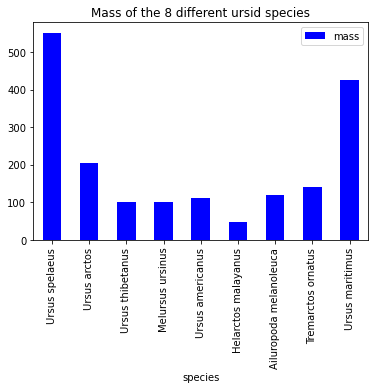

In [15]:
bears_df.plot(kind='bar', x='species', y='mass', color='blue', title='Mass of the 8 different ursid species') #using the .plot function, this creates a figure from the provided data frame with specified parameters for x and y, color, and title

### What is the largest bear species?

The largest bear species by mass is ursus spelaeus (based on this data set)

### What else is interesting about this species?

This bear is commonly known as the cave bear and went extinct by 24,000 years ago. Based on skull anatomy, the bears were likely mainly or fully vegetarian. Most fossils were found in caves which is where the bear gets its name, but this also means that these bears likely died during hibernation. Climatic cooling resulting in lower vegetation likely contributed largely to this species demise. From Pacher and Stuart, 2008.

## Function 9: Plot the GC content (x axis) vs. molecular weight (y axis)

<AxesSubplot:title={'center':'GC content vs. molecular weight of DNA sequences in 8 ursid species'}, xlabel='GC_content', ylabel='molecular_weight'>

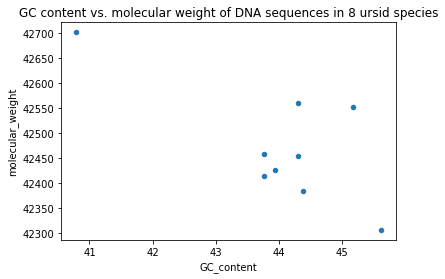

In [16]:
bears_df.plot(x = 'GC_content', y = 'molecular_weight', kind ='scatter', title ='GC content vs. molecular weight of DNA sequences in 8 ursid species') #creates a new scatterplot of the GC content plotted against each species molecular weight


## Function 10: Save the new data frame to a file called "bears_mass_cytb.csv"

In [17]:
bears_df.to_csv("bears_mass_cytb.csv") #creates a new csv file and puts it into the folder this project is in

### Function 11: Bonus

Finding the correlation between molecular weight and GC content and plotting the line of best fit of the GC content against molecular weight

In [18]:
bears_df.dtypes #shows that the molecular weight and GC content variables are objects, they need to be numeric, found from this website https://thispointer.com/how-to-get-check-data-types-of-dataframe-columns-in-python-pandas/

species              object
mass                float64
molecular_weight     object
GC_content           object
dtype: object

In [19]:
#since the data types need to be converted, we use this function below that I learned about from this website https://www.datasciencemadesimple.com/convert-character-to-numeric-pandas-python-string-to-integer-2/
bears_df['molecular_weight']=pd.to_numeric(bears_df.molecular_weight) #converts the molecular weight column into numeric values
bears_df['GC_content']=pd.to_numeric(bears_df.GC_content) #converts the GC content column into numeric values
bears_df.dtypes #shows what the data type is for each column

species              object
mass                float64
molecular_weight    float64
GC_content          float64
dtype: object

In [20]:
y = bears_df['molecular_weight'] #designates y as a variable containing the column 'molecular_weight'
x = bears_df['GC_content'] #designates x as a variable containing the column 'GC_content'
correlation = y.corr(x) #computes the correlation between y and x
print(correlation) #shows the calculated correlation as an r^2 value

-0.7185360511641113


Text(0.5, 1.0, 'Correlation')

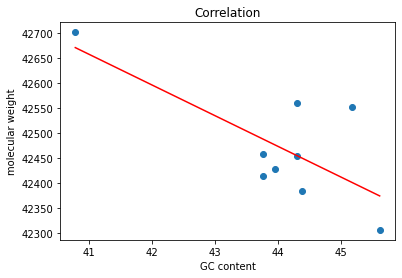

In [23]:
plt.scatter(x, y) #creates a new scatterplot from designated variables
plt.plot(np.unique(x), np. poly1d(np.polyfit(x, y, 1)) #fits the correlation to a new line in the figure
(np.unique(x)),color='red') #designates the color of the line of best fit as red
plt.xlabel('GC content') #designates the x axis label as 'GC content'
plt.ylabel('molecular weight') #designates the y axis label as 'molecular weight'
plt.title('Correlation') #designates the title as 'Correlation'
#I found how to plot the line of best fit from this website https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/

Please contact me at topping@iastate.edu if you have any questions regarding the code, or if there happens to be an error